<a href="https://colab.research.google.com/github/kadesole22/Lab-10---SVM/blob/main/Copy_of_SupportVectorMachinesW25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn import svm
import pandas as pd
import numpy as np

C=1e+03 #1000
gamma=1e-05 #0.0001
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

In [11]:
import pandas as pd
train = pd.read_csv('diabetes_train (1).csv') #this is our dataset, please change the path for your case
test = pd.read_csv('diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [12]:
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative'], dtype=object)

In [13]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(6), np.int64(1), np.int64(1), np.int64(2))

In [20]:
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)
C_values=[1e+03, 1e+04, 1e+05]
gamma_values=[1e-05, 1e-06, 1e-07]
best_acc = 0
best_model = None
best_params = {}

for c in C_values:
    for g in gamma_values:
        clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
        clf.fit(train.iloc[:, 0:8], train.iloc[:, 8])
        y_pred = clf.predict(test.iloc[:, 0:8])

        # Calculate confusion matrix and accuracy
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        acc = (tp + tn) / (tp + tn + fp + fn)
        print(f"C={c}, gamma={g}, accuracy={acc:.4f}")

        # Keep track of best model
        if acc > best_acc:
            best_acc = acc
            best_model = clf
            best_params = {'C': c, 'gamma': g}

print("\nBest Parameters:", best_params)
print("Best Accuracy:", best_acc)

C=1000.0, gamma=1e-05, accuracy=0.8000
C=1000.0, gamma=1e-06, accuracy=0.9000
C=1000.0, gamma=1e-07, accuracy=0.9000
C=10000.0, gamma=1e-05, accuracy=0.8000
C=10000.0, gamma=1e-06, accuracy=0.8000
C=10000.0, gamma=1e-07, accuracy=0.9000
C=100000.0, gamma=1e-05, accuracy=0.8000
C=100000.0, gamma=1e-06, accuracy=0.9000
C=100000.0, gamma=1e-07, accuracy=0.9000

Best Parameters: {'C': 1000.0, 'gamma': 1e-06}
Best Accuracy: 0.9


In [22]:
import numpy as np
from sklearn.metrics import roc_curve, auc
#from scipy import interp

y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])
scores[:,1]
#y is the true labels, scores[:,1] which has probabilities
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
#fpr, tpr, thresholds = roc_curve(true_labels, scores[:,1], pos_label=1)

roc_auc = auc(fpr,tpr)

print(fpr)

print(tpr)

print(thresholds)

[0.         0.         0.         0.28571429 0.28571429 1.        ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
[       inf 0.89568189 0.87472362 0.33875213 0.2681609  0.11166449]


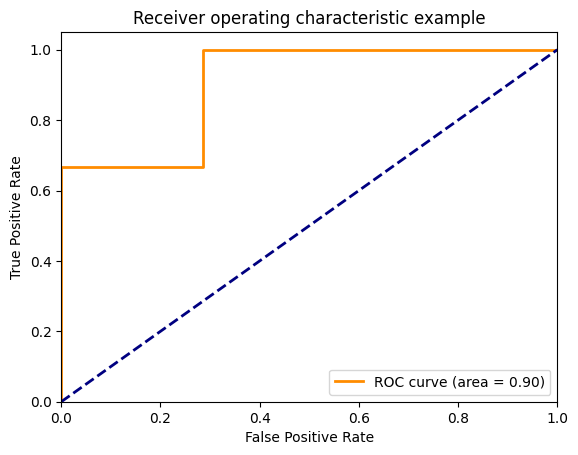

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()